In [43]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

%config InlineBackend.figure_format = 'svg'

# Если очень много данных в наборе (колонок, столбцов и пр. инф-ии), разумно увеличить размер:
from pylab import rcParams
rcParams["figure.figsize"] = 8, 5

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df = pd.read_csv("/content/drive/MyDrive/videogames_sales.csv").dropna()

Подробнее о признаках в датасете - https://www.kaggle.com/datasets/gregorut/videogamesales, файл c данными выложен на GitHub в папку datasets

In [45]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


In [48]:
df["User_Score"] = df.User_Score.astype("float64")
df["Year_of_Release"] = df.Year_of_Release.astype("int64")
df["User_Count"] = df.User_Count.astype("int64")
df["Critic_Count"] = df.Critic_Count.astype("int64")

In [50]:
df.shape

(6825, 16)

In [ ]:
# Для того, чтобы прочитать графики без труда, возьмем небольшое количество признаков из таблицы

useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


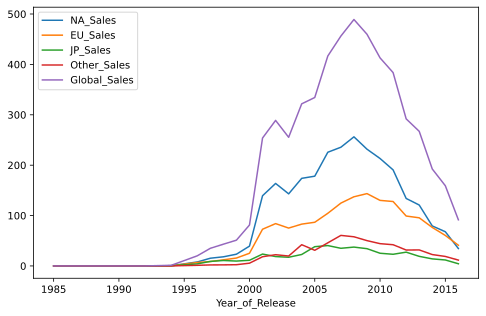

In [ ]:
# В Pandas, кстати, есть и свой способ визуализации данных - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html 
# попробуем построить график продаж видео игр в различных странах в зависимости от года :

df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot();

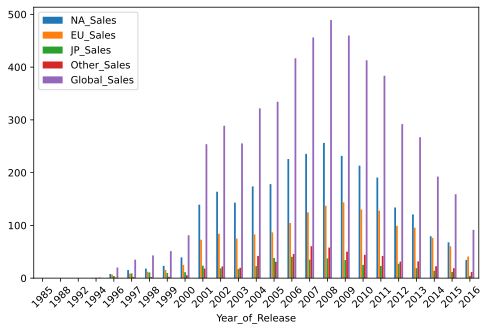

In [ ]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45); # параметр kind="" позволяет изменить тип графика 

## Seaborn

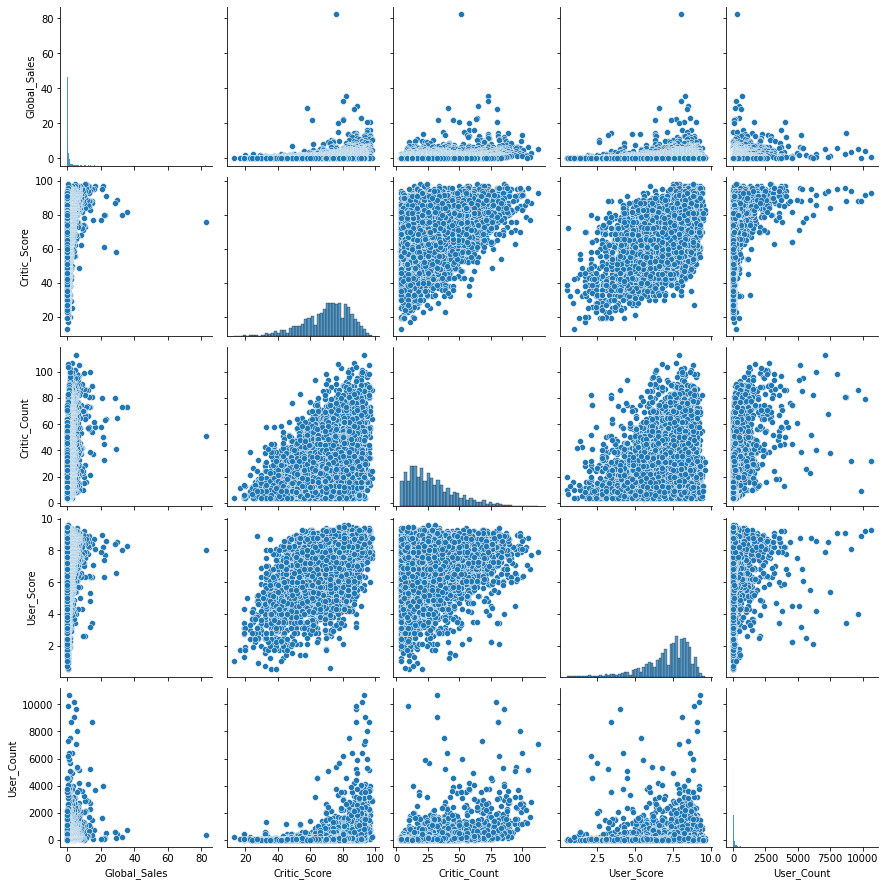

In [51]:
# Построим pair plot - https://seaborn.pydata.org/generated/seaborn.pairplot.html - посмотрим на связь признаков между собой 

%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

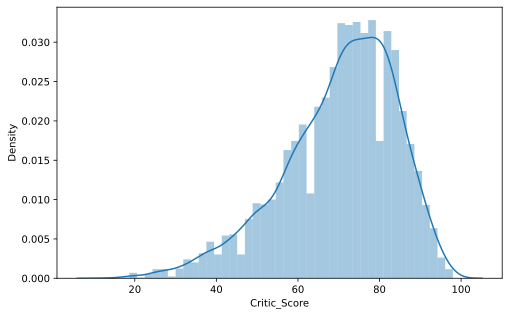

In [ ]:
# Построим распределение признака при помощи distplot - https://seaborn.pydata.org/generated/seaborn.distplot.html

%config InlineBackend.figure_format = 'svg'
sns.distplot(df.Critic_Score);

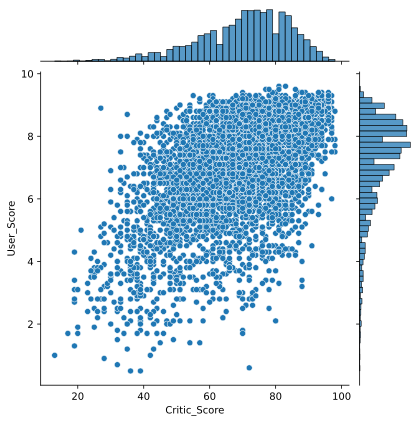

In [ ]:
# Построим joint plot - https://seaborn.pydata.org/generated/seaborn.jointplot.html - сможем исследовать взаимосвязь двух конкретных признаков 

sns.jointplot(x = "Critic_Score", y = "User_Score", data = df, kind = "scatter");

Еще один полезный тип графиков – это __`box plot`__. Давайте сравним пользовательские оценки игр для топ-5 крупнейших игровых платформ.

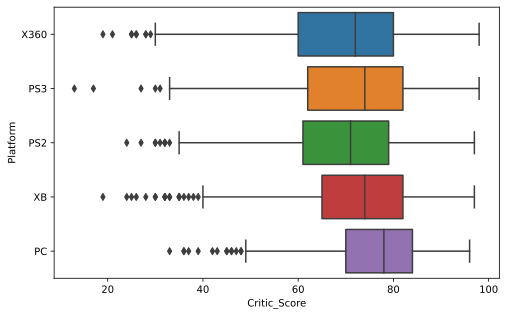

In [ ]:
# Построим "ящик с усами" для рассмотрения статистических характеристик и сравнения по ним - https://seaborn.pydata.org/generated/seaborn.boxplot.html

top_platforms = (
    df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y = "Platform", x = "Critic_Score", data = df[df.Platform.isin(top_platforms)], orient = "h"
);

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой статье) - это __`heat map`__. `Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

In [ ]:
# Построим heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html - матрицу корреляции между признаками, иными словами 

platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)

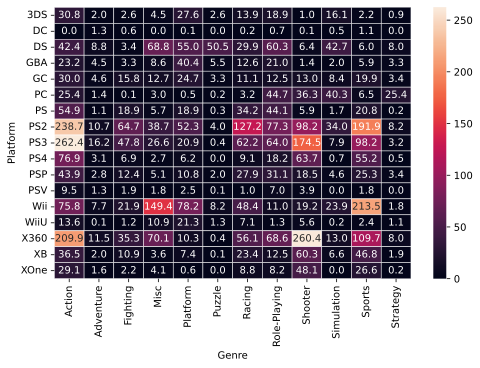

In [ ]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

# Plotly

In [ ]:
# Инициализируем plotly 

init_notebook_mode(connected=True)

In [ ]:
# Построим line plot с динамикой числа вышедших игр и их продаж по годам

years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [ ]:
trace0 = go.Scatter(x=years_df.index, y=years_df.Global_Sales, name="Global Sales")

trace1 = go.Scatter(
    x=years_df.index, y=years_df.Number_of_Games, name="Number of games released"
)

data = [trace0, trace1]
layout = {"title": "Statistics of video games"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [ ]:
# Посмотрим при помощи bar chat на рыночную долю игровых платформ, расчитанную по количеству выпущенных игр и по суммарной выручке

platforms_df = (
    df.groupby("Platform")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Platform")[["Name"]].count())
)
platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [ ]:
trace0 = go.Bar(x=platforms_df.index, y=platforms_df.Global_Sales, name="Global Sales")

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name="Number of games released",
)

data = [trace0, trace1]
layout = {"title": "Share of platforms"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [ ]:
# boxplot тоже можно построить и тут: 

data = []

for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))
iplot(data, show_link=False)